##### Topic - Satellite LSTM: Predicting Greenhouse Gas Emissions

## Data loading & Pre-Processing

###### Dataset available at https://drive.google.com/file/d/1_zFYzWvgqx5Pe7XXJ7t4kf9ZvselPHyh/view?usp=drive_link

In [ ]:
# Uncomment below line to download necessary libraries to set up the project environment
# %pip install absl-py==2.0.0 asttokens==2.4.1 astunparse==1.6.3 cachetools==5.3.2 certifi==2023.11.17 charset-normalizer==3.3.2 colorama==0.4.6 comm==0.2.0 contourpy==1.2.0 cycler==0.12.1 debugpy==1.8.0 decorator==5.1.1 executing==2.0.1 flatbuffers==23.5.26 fonttools==4.45.1 gast==0.5.4 google-auth==2.23.4 google-auth-oauthlib==1.1.0 google-pasta==0.2.0 grpcio==1.59.3 h5py==3.10.0 idna==3.6 imageio==2.33.0 ipykernel==6.26.0 ipython==8.18.0 jedi==0.19.1 joblib==1.3.2 jupyter_client==8.6.0 jupyter_core==5.5.0 keras==2.15.0 kiwisolver==1.4.5 lazy_loader==0.3 libclang==16.0.6 Markdown==3.5.1 MarkupSafe==2.1.3 matplotlib==3.8.2 matplotlib-inline==0.1.6 ml-dtypes==0.2.0 nest-asyncio==1.5.8 networkx==3.2.1 numpy==1.26.2 oauthlib==3.2.2 opencv-python==4.8.1.78 opt-einsum==3.3.0 packaging==23.2 pandas==2.1.3 parso==0.8.3 Pillow==10.1.0 platformdirs==4.0.0 prompt-toolkit==3.0.41 protobuf==4.23.4 psutil==5.9.6 pure-eval==0.2.2 pyasn1==0.5.1 pyasn1-modules==0.3.0 Pygments==2.17.2 pyparsing==3.1.1 python-dateutil==2.8.2 pytz==2023.3.post1 pywin32==306 pyzmq==25.1.1 requests==2.31.0 requests-oauthlib==1.3.1 rsa==4.9 scikit-image==0.22.0 scikit-learn==1.3.2 scipy==1.11.4 six==1.16.0 stack-data==0.6.3 tensorboard==2.15.1 tensorboard-data-server==0.7.2 tensorflow==2.15.0 tensorflow-estimator==2.15.0 tensorflow-intel==2.15.0 tensorflow-io-gcs-filesystem==0.31.0 termcolor==2.3.0 threadpoolctl==3.2.0 tifffile==2023.9.26 tornado==6.3.3 traitlets==5.13.0 typing_extensions==4.8.0 tzdata==2023.3 urllib3==2.1.0 wcwidth==0.2.12 Werkzeug==3.0.1 wrapt==1.14.1

In [160]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2

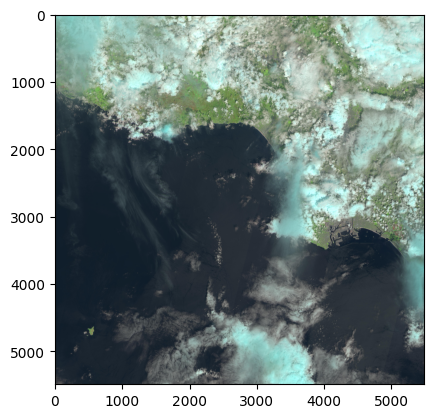

In [161]:
image = plt.imread("../DLMiniProjectData/20190429T183604.tif",cv2.IMREAD_UNCHANGED)
plt.imshow(image)

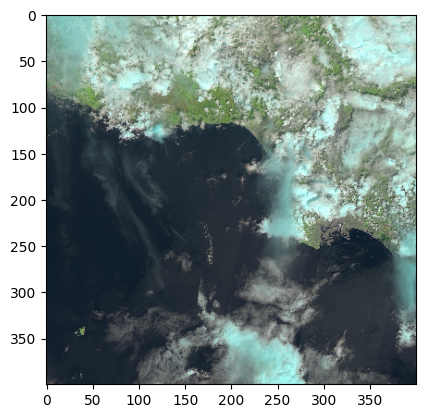

In [162]:
imageS = cv2.resize(image,(400,400))
plt.imshow(imageS)

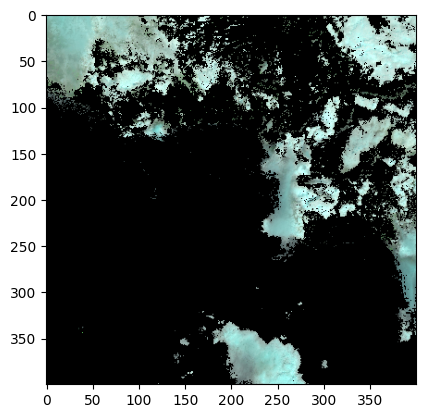

In [163]:
import cv2
import numpy as np
img_hsv = cv2.cvtColor(imageS, cv2.COLOR_BGR2HSV)
hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
hsv_color1 = np.asarray([30, 30, 30], np.uint8)   

mask = cv2.inRange(img_hsv, hsv_color1, hsv_color2)

res = cv2.bitwise_and(imageS,imageS, mask = mask)

plt.imshow(res)   # this colormap will display in black / white
plt.show()

In [164]:
import cv2
from skimage import data, img_as_float
h, z, img_gray = cv2.split(res)


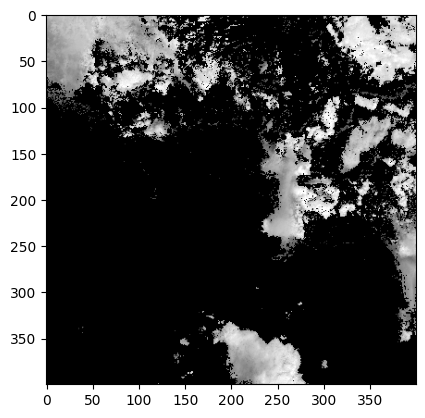

In [165]:
plt.imshow(img_gray, cmap="gray")

In [166]:
img_gray[img_gray > 0] = 1


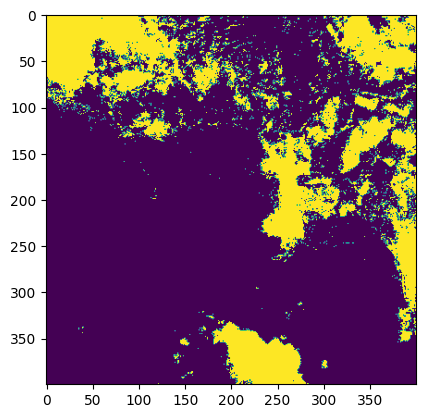

In [167]:
plt.imshow(img_gray)

In [168]:
import os
from sklearn import preprocessing
all_samples = np.empty(shape=(230,40,40,1))
count = 1;
for x in sorted(os.listdir("../DLMiniProjectData/")):
        photo = cv2.imread("../DLMiniProjectData/" + x) 
        photo = cv2.resize(photo,(40,40))
        photo_hsv = cv2.cvtColor(photo, cv2.COLOR_BGR2HSV)
        p_hsv_color2 = np.asarray([60, 255, 255], np.uint8) 
        p_hsv_color1 = np.asarray([30, 30, 30], np.uint8)   
        photo_mask = cv2.inRange(photo_hsv, p_hsv_color1, p_hsv_color2)
        photo_res = cv2.bitwise_and(photo,photo, mask = photo_mask)
        p_h, p_z, p_img_gray = cv2.split(photo_res)
        p_img_gray[p_img_gray > 0] = 1
        p_img_gray = np.reshape(p_img_gray,(40,40,1))
        all_samples[count] = p_img_gray
        print(count, "images added")
        count = count + 1

1 images added
2 images added
3 images added
4 images added
5 images added
6 images added
7 images added
8 images added
9 images added
10 images added
11 images added
12 images added
13 images added
14 images added
15 images added
16 images added
17 images added
18 images added
19 images added
20 images added
21 images added
22 images added
23 images added
24 images added
25 images added
26 images added
27 images added
28 images added
29 images added
30 images added
31 images added
32 images added
33 images added
34 images added
35 images added
36 images added
37 images added
38 images added
39 images added
40 images added
41 images added
42 images added
43 images added
44 images added
45 images added
46 images added
47 images added
48 images added
49 images added
50 images added
51 images added
52 images added
53 images added
54 images added
55 images added
56 images added
57 images added
58 images added
59 images added
60 images added
61 images added
62 images added
63 images added
6

In [169]:
all_samples[225] = all_samples[0]
all_samples[226] = all_samples[1]
all_samples[227] = all_samples[2]
all_samples[228] = all_samples[3]
all_samples[229] = all_samples[4]

In [172]:
count = 0
final = np.empty((225,5,40,40,1))
for i in range(225):
    bundle = np.array([all_samples[i],all_samples[i+1],all_samples[i+2],all_samples[i+3],all_samples[i+4]])
    final[i] = bundle
X_train = final[0:165]
X_test = final[166:221]
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")

(165, 5, 40, 40, 1) X_train shape
(55, 5, 40, 40, 1) X_test shape


In [173]:
y_train = final[5:170]
y_test = final[171:226]
print(X_train.shape, "X_train shape")
print(X_test.shape, "X_test shape")

(165, 5, 40, 40, 1) X_train shape
(55, 5, 40, 40, 1) X_test shape


In [174]:
all_samples.shape

(230, 40, 40, 1)

## Seq2seq ConvLSTM model

In [175]:
from keras.models import Sequential
from keras.layers import Conv3D
from keras.layers import ConvLSTM2D
from keras.layers import BatchNormalization

In [176]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=1, kernel_size=(2, 2),
                   input_shape=(5, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=1, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='mean_absolute_error', optimizer='nadam')
seq.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_5 (ConvLSTM2D)  (None, 5, 40, 40, 1)      36        
                                                                 
 batch_normalization_12 (Ba  (None, 5, 40, 40, 1)      4         
 tchNormalization)                                               
                                                                 
 conv_lstm2d_6 (ConvLSTM2D)  (None, 5, 40, 40, 1)      76        
                                                                 
 batch_normalization_13 (Ba  (None, 5, 40, 40, 1)      4         
 tchNormalization)                                               
                                                                 
 conv3d_3 (Conv3D)           (None, 5, 40, 40, 1)      28        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 144

## training

In [177]:
# seq.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.1)
# seq.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.1,verbose=1, shuffle=False)
hist = seq.fit(X_train, y_train, batch_size=10, epochs=50, validation_split=0.1,verbose=1, shuffle=False)

Epoch 1/50
15/15 [==============================] - 14s 145ms/step - loss: 0.5419 - val_loss: 0.4964
Epoch 2/50
15/15 [==============================] - 1s 62ms/step - loss: 0.5038 - val_loss: 0.4933
Epoch 3/50
15/15 [==============================] - 1s 56ms/step - loss: 0.4773 - val_loss: 0.4904
Epoch 4/50
15/15 [==============================] - 1s 58ms/step - loss: 0.4617 - val_loss: 0.4864
Epoch 5/50
15/15 [==============================] - 1s 51ms/step - loss: 0.4415 - val_loss: 0.4793
Epoch 6/50
15/15 [==============================] - 1s 47ms/step - loss: 0.4053 - val_loss: 0.4661
Epoch 7/50
15/15 [==============================] - 1s 52ms/step - loss: 0.3560 - val_loss: 0.4469
Epoch 8/50
15/15 [==============================] - 1s 60ms/step - loss: 0.3101 - val_loss: 0.4276
Epoch 9/50
15/15 [==============================] - 1s 50ms/step - loss: 0.2767 - val_loss: 0.4118
Epoch 10/50
15/15 [==============================] - 1s 42ms/step - loss: 0.2553 - val_loss: 0.3941
Epoch 1

## Prediction

In [178]:
Y_hat = seq.predict(X_test, verbose=0)
Y_hat.shape
y_test.shape

(54, 5, 40, 40, 1)

## Visualization of predictions

In [179]:
from sklearn import preprocessing
def visulization(y, y_hat, n_slots):
    import random
    import matplotlib.pyplot as plt
    import numpy as np
    length = y_hat.shape[0]
    random_ind = [x for x in range(0,n_slots)]
    stations = ['0', '1', '2', '3', '4', '5', '6']
    fea = ['0', '1', '2', '3', '4']
    setCount = 1;
    for ind in random_ind:
        setCount = setCount+1;
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,0,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,0,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'NEW SET, Ground truth Frame 1', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,1,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,1,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 2', fontsize=13)
    
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        
        y_pre = y_hat[ind,2,:,:,0] 
        ax1.imshow(y_pre)

        y_truth = y[ind,2,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 3', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))
        y_pre = y_hat[ind,3,:,:,0] 
        ax1.imshow(y_pre)

        y_truth = y[ind,3,:,:,0]
        ax2.imshow(y_truth)

        plt.text(2, -0.8, 'Ground truth Frame 4', fontsize=13)
    
        fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))

        y_pre = y_hat[ind,4,:,:,0] 
        ax1.imshow(y_pre)
        y_truth = y[ind,4,:,:,0]
        ax2.imshow(y_truth)
        plt.text(2, -0.8, 'Ground truth Frame 5', fontsize=13)
    

C:\Users\Khyati\AppData\Local\Temp\ipykernel_27824\507949495.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2)= plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 5))


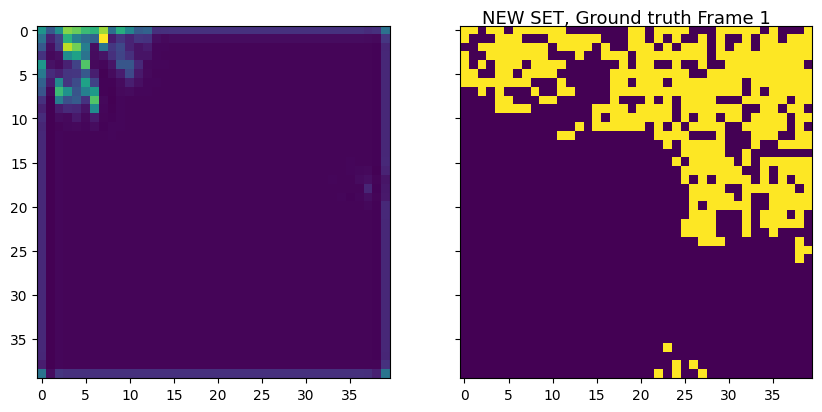

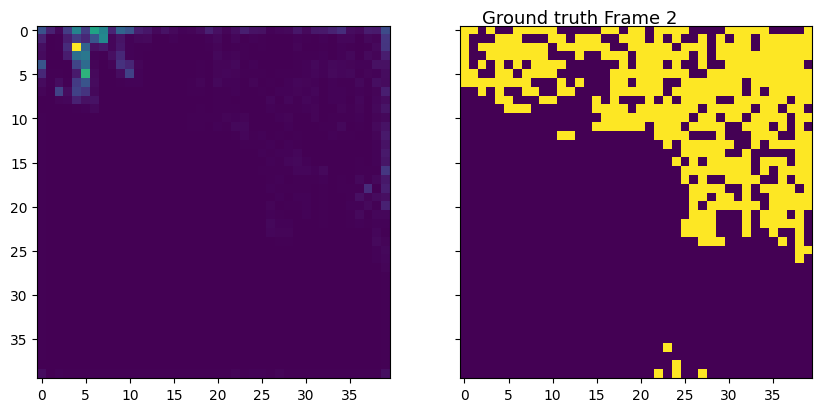

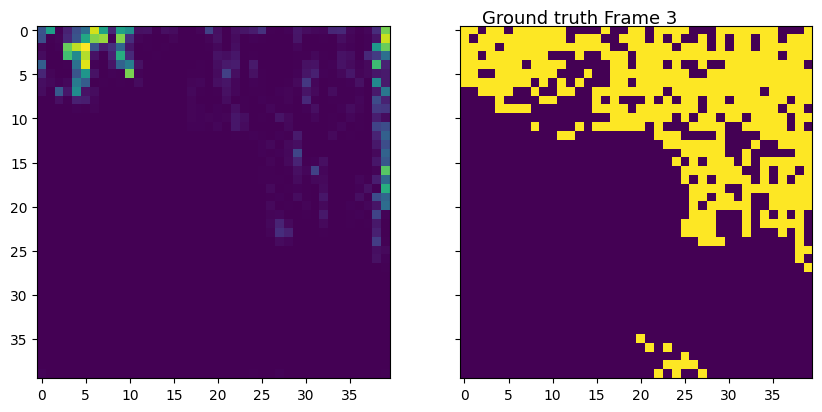

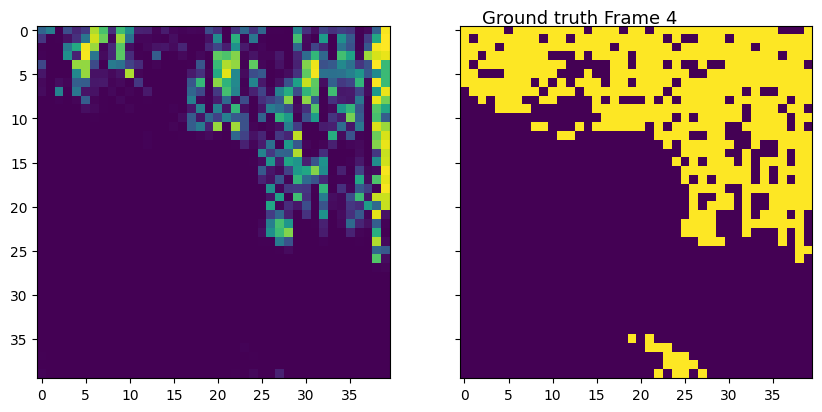

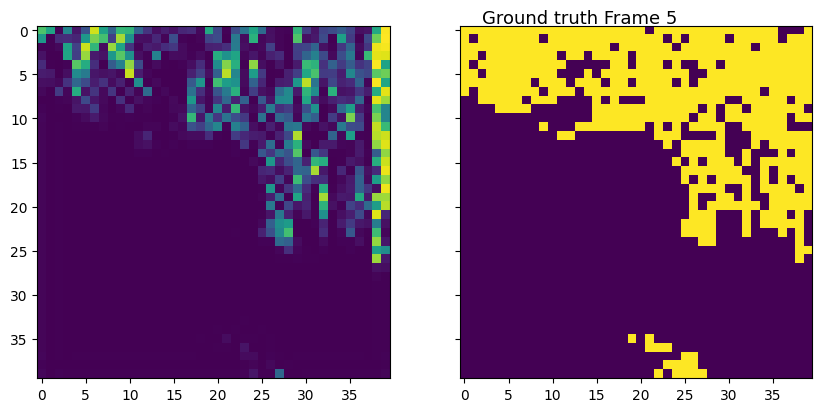

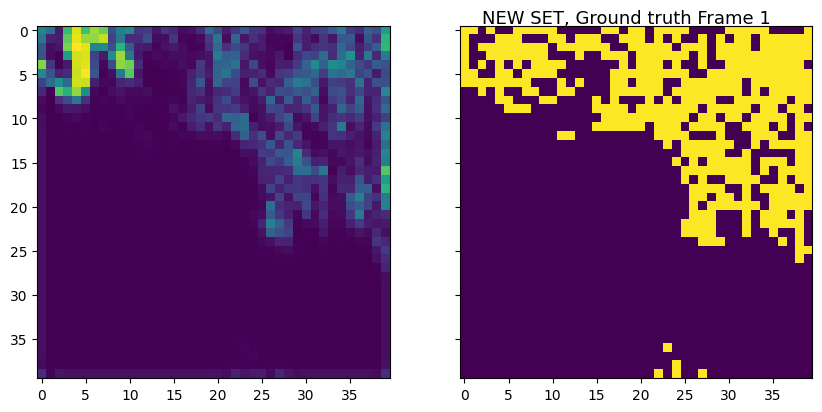

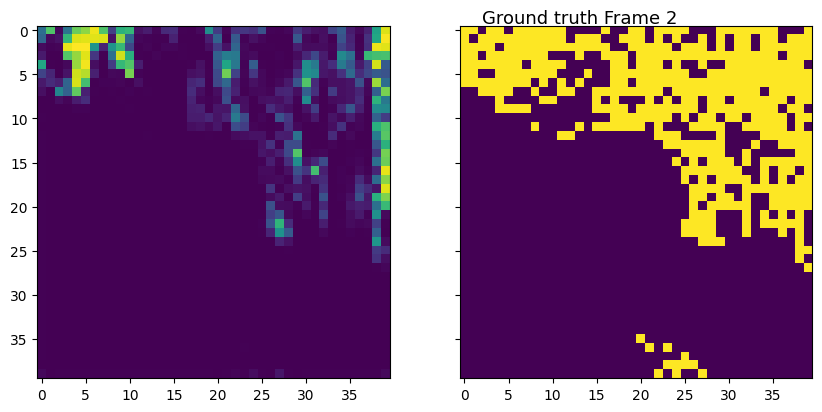

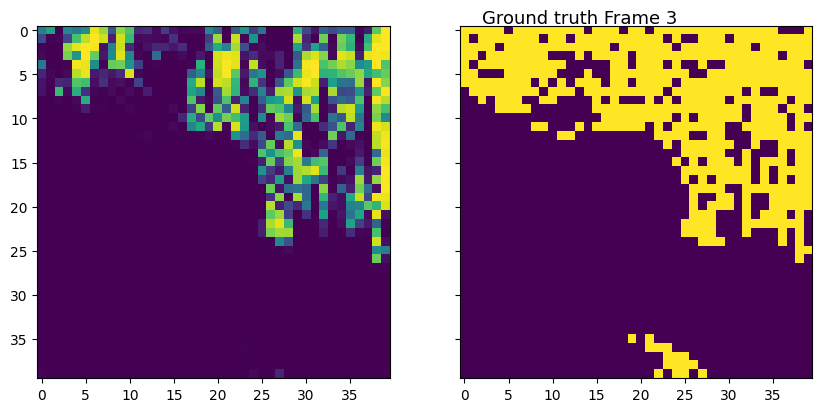

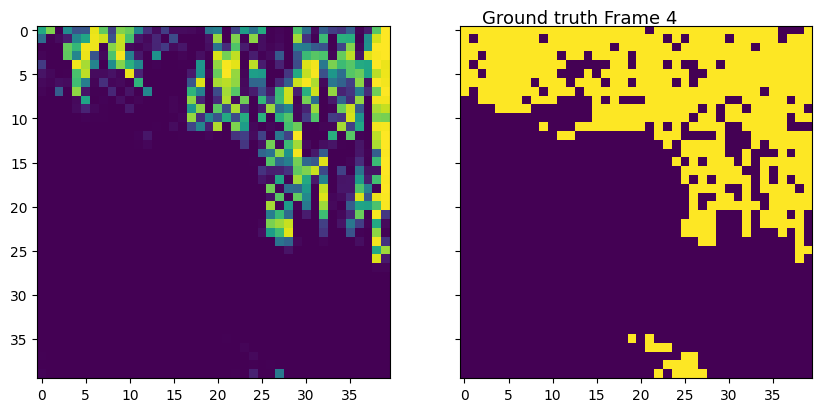

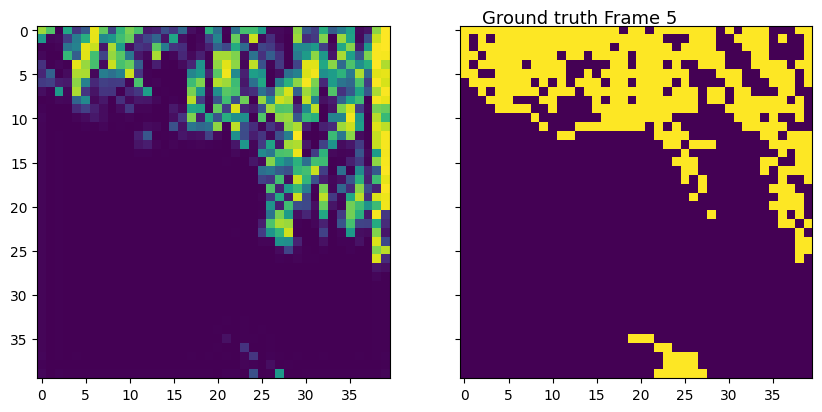

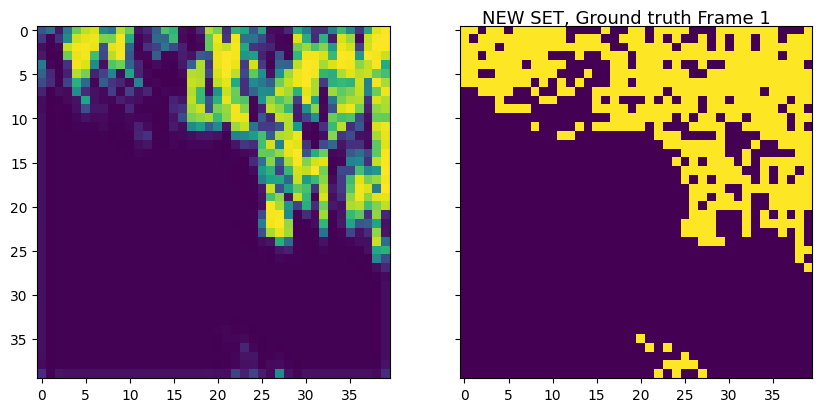

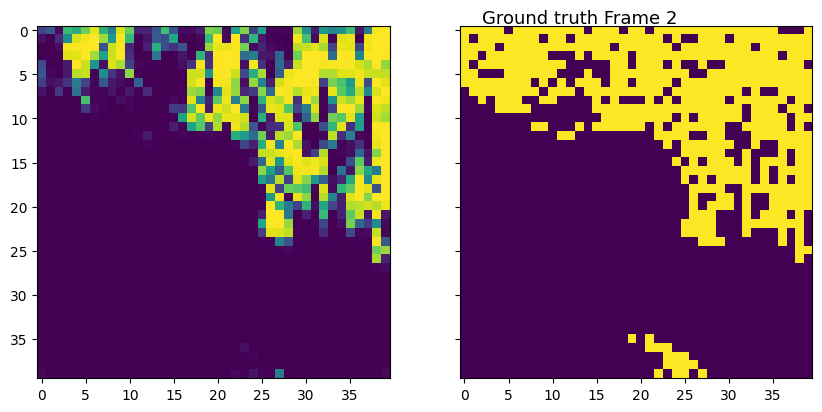

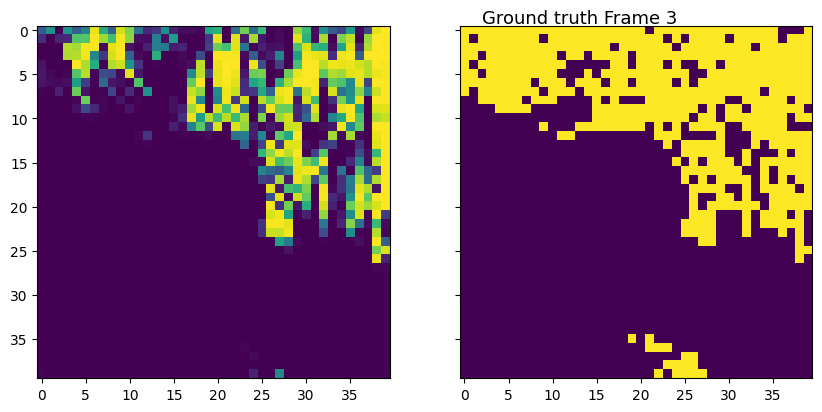

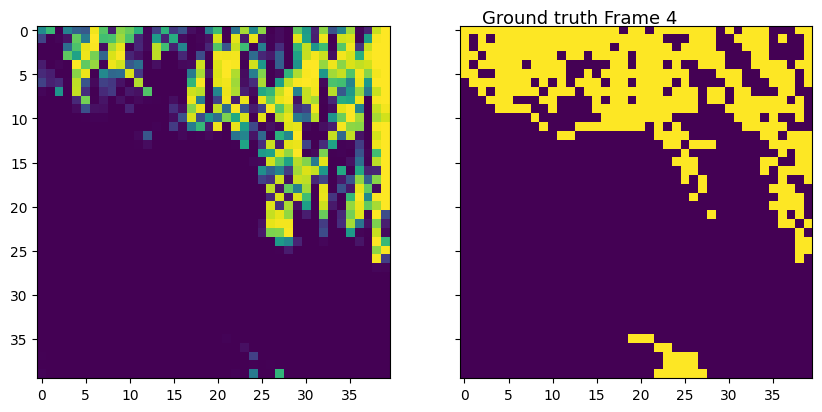

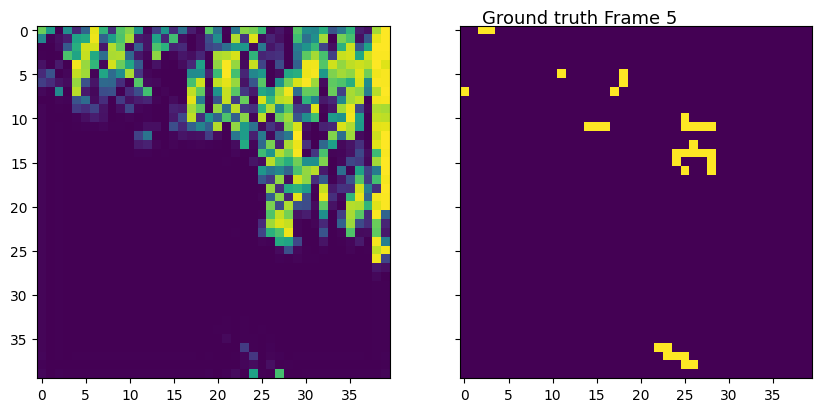

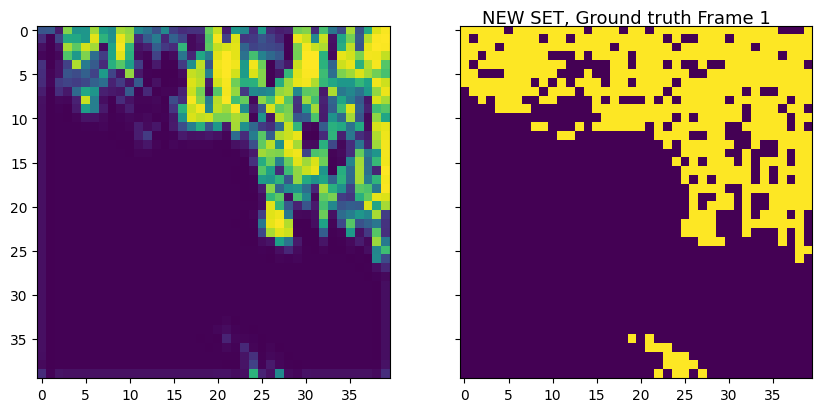

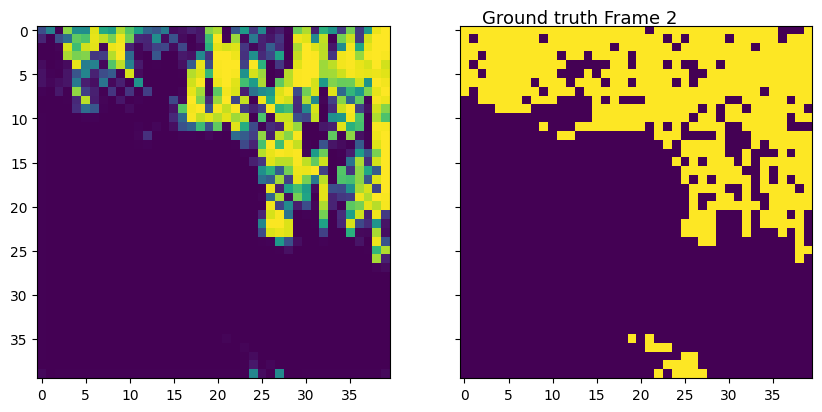

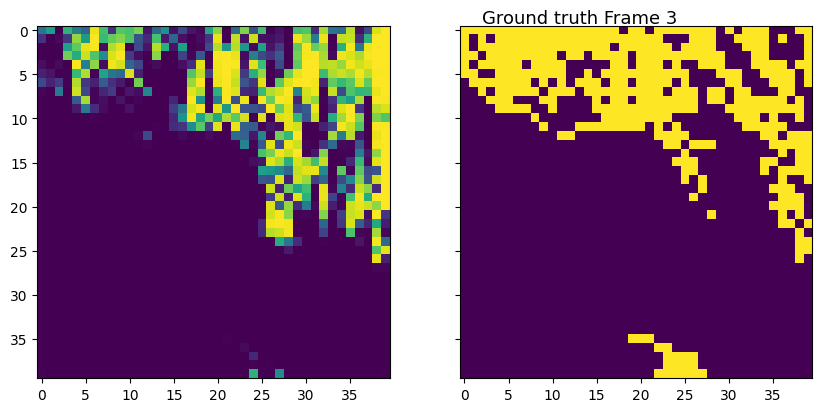

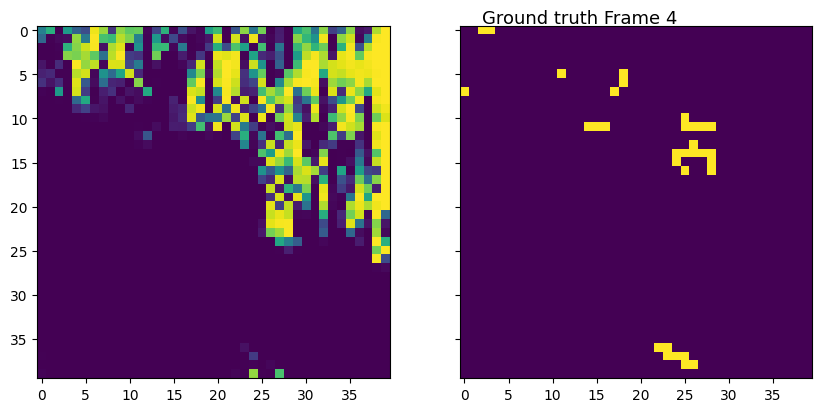

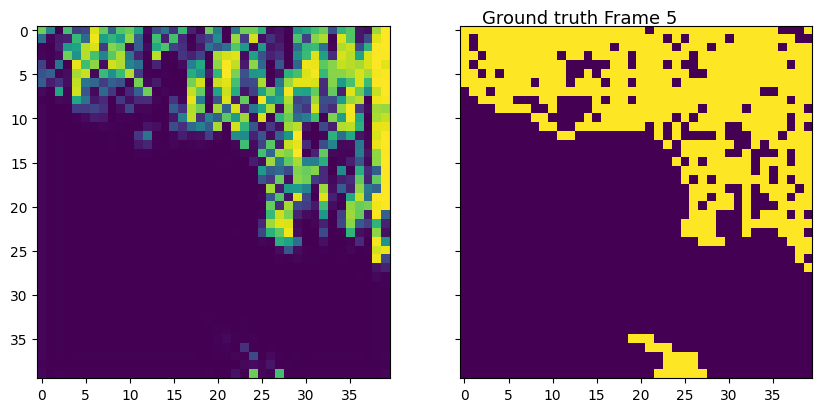

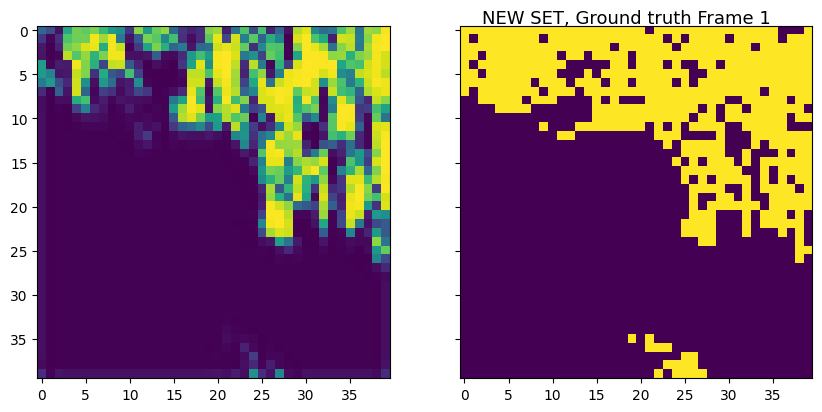

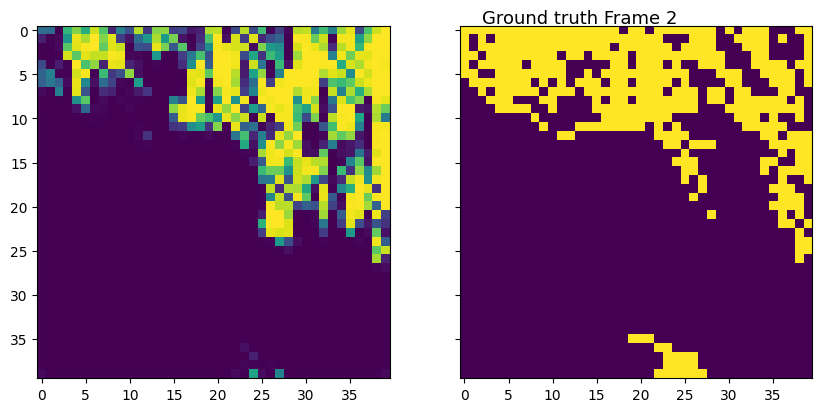

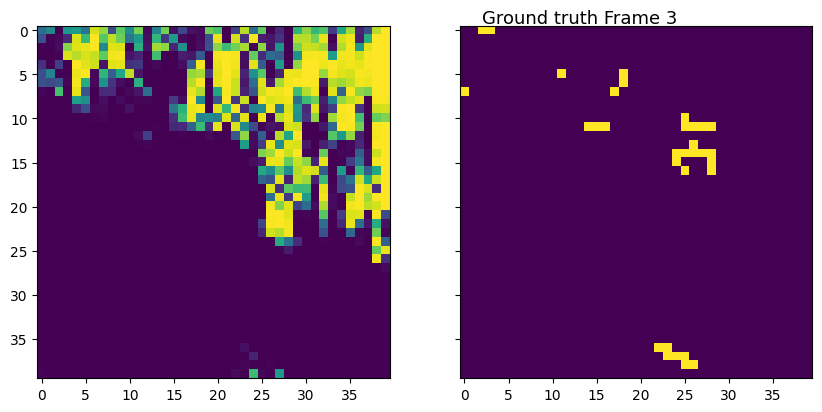

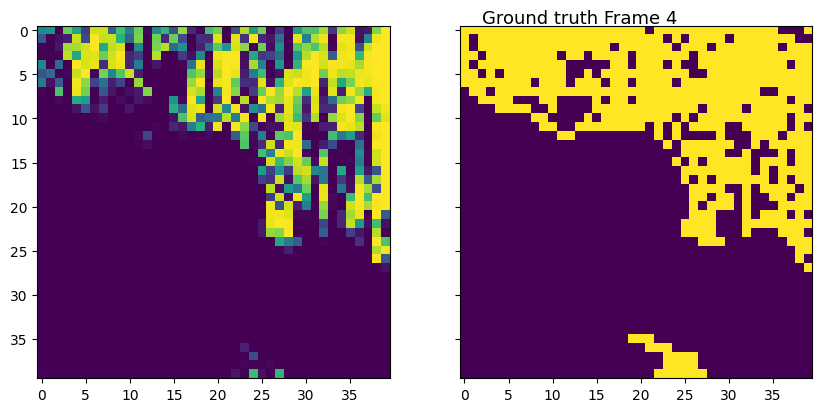

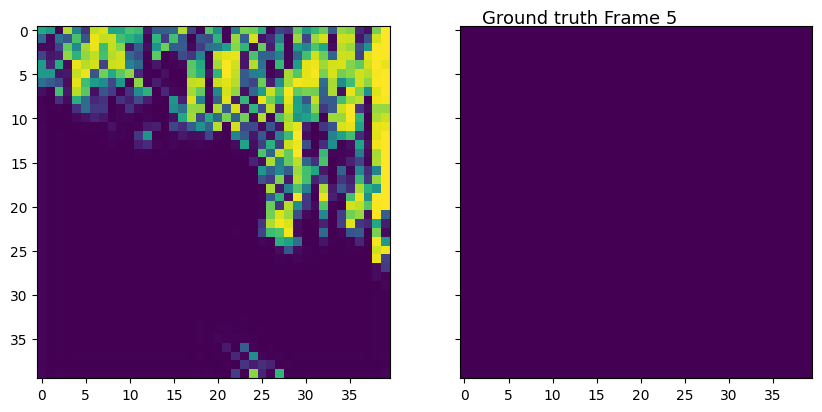

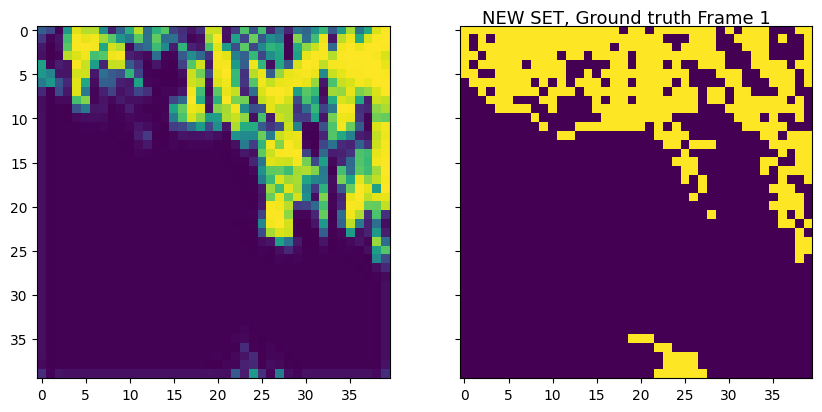

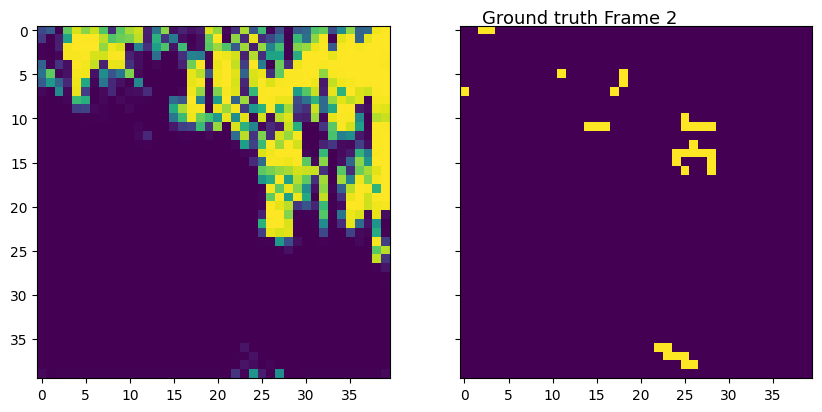

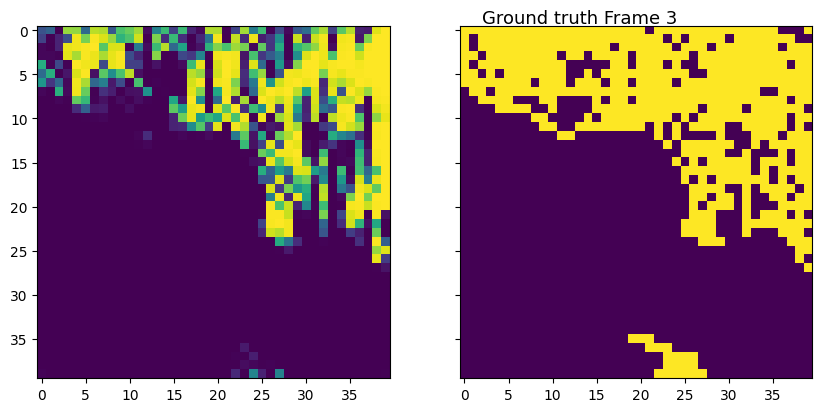

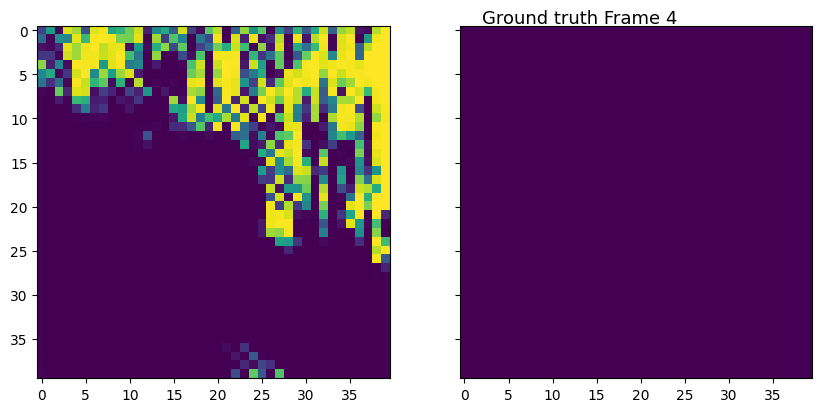

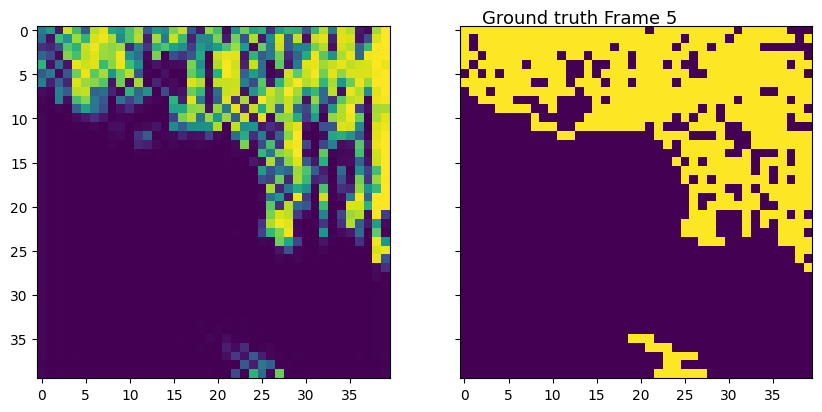

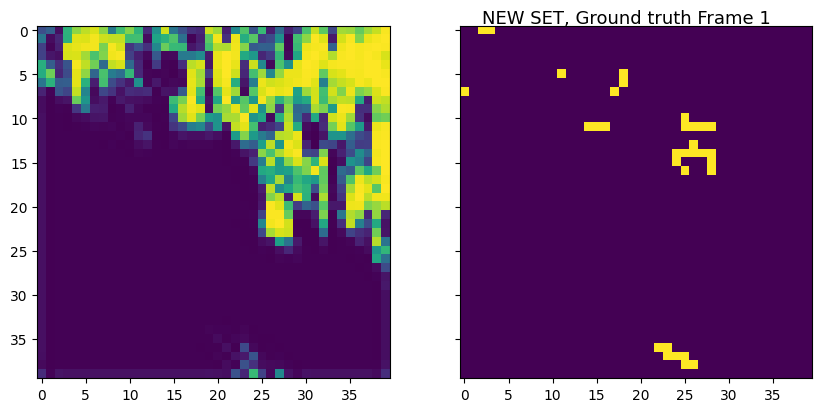

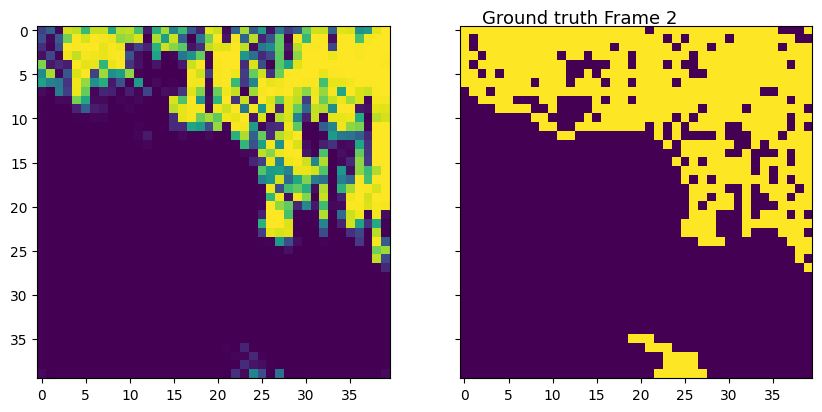

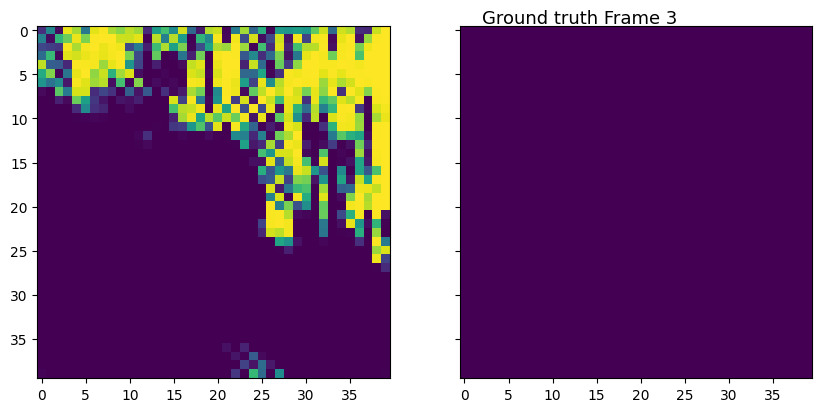

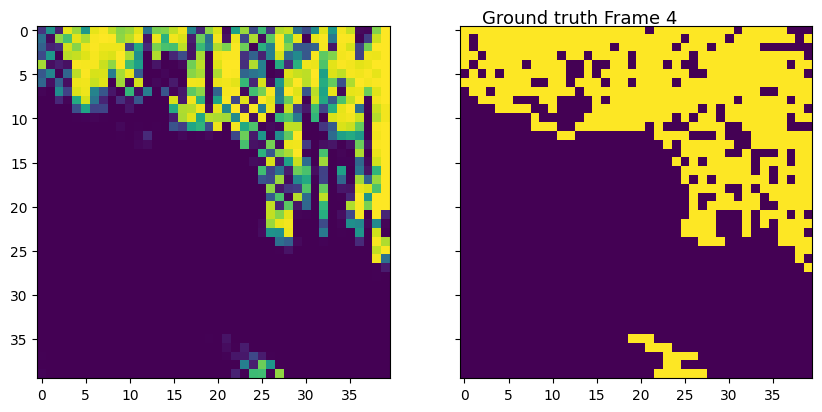

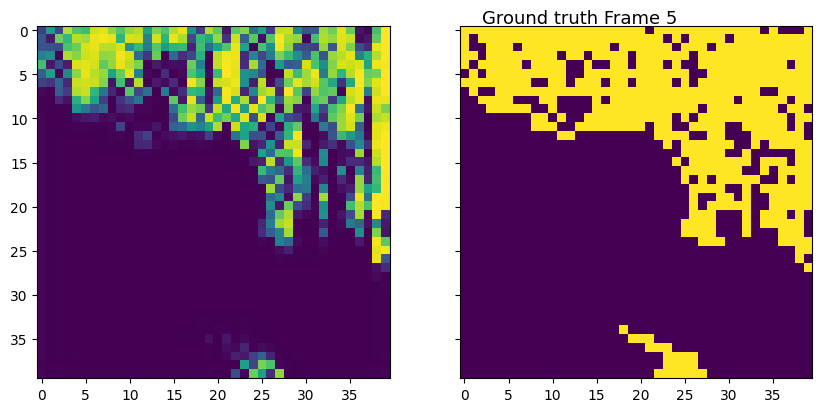

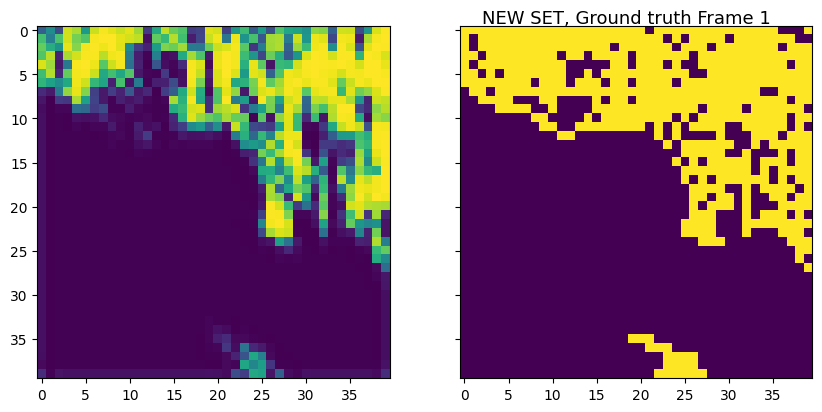

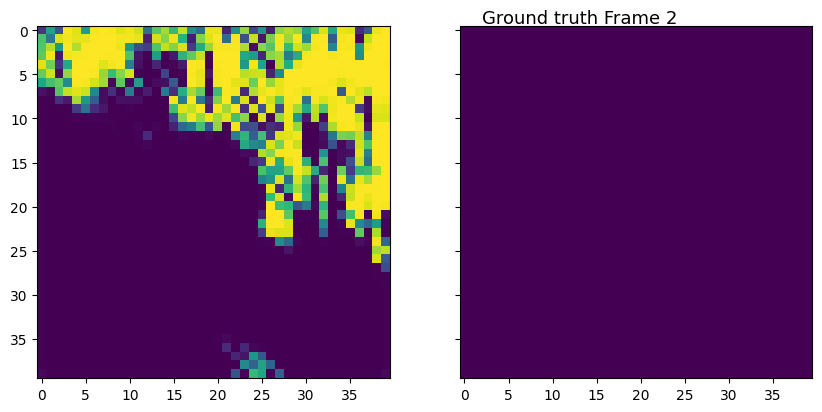

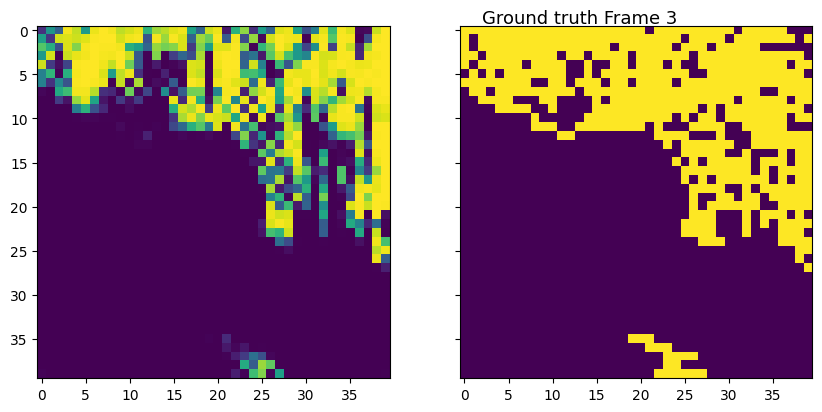

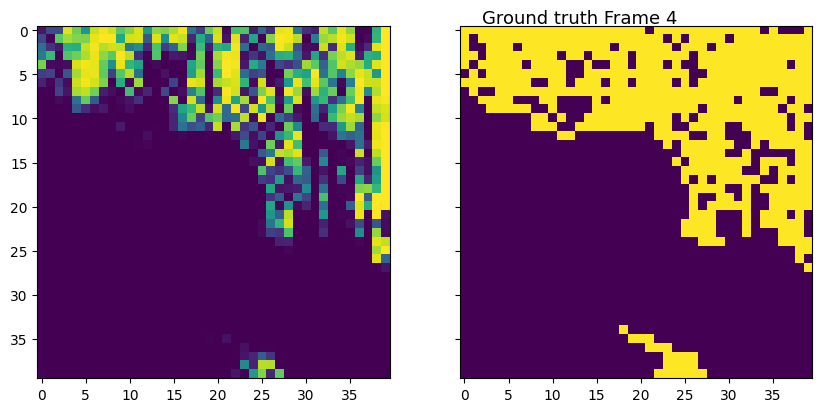

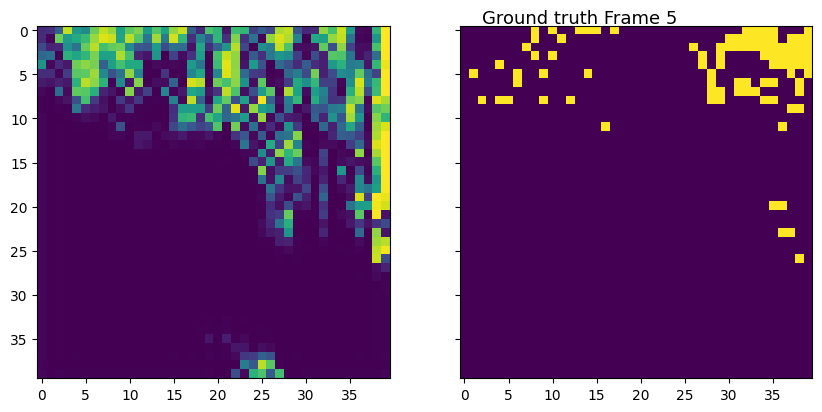

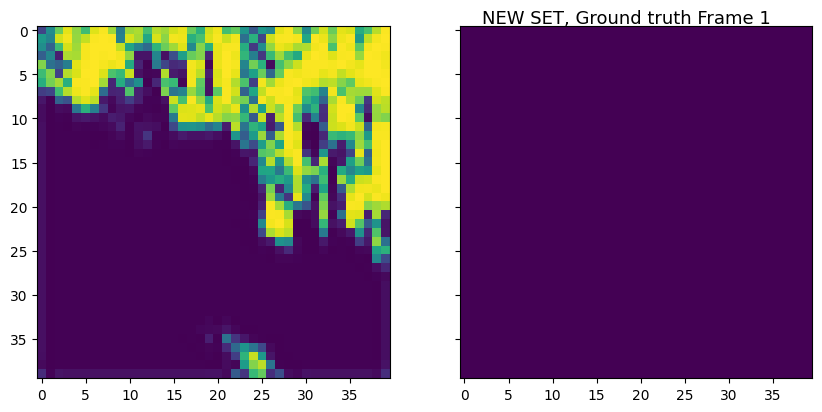

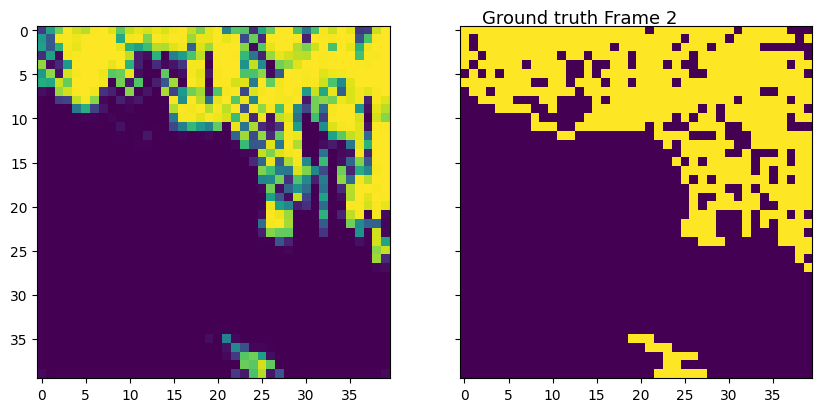

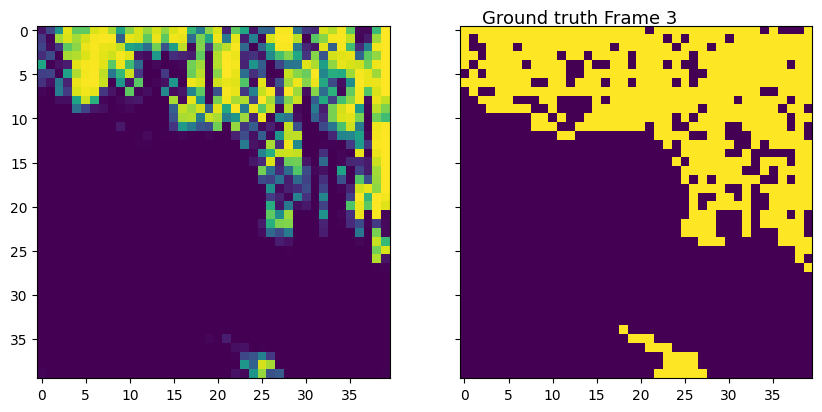

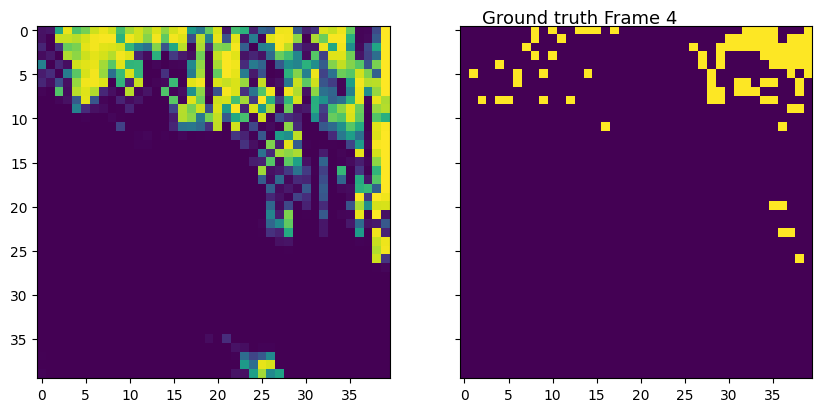

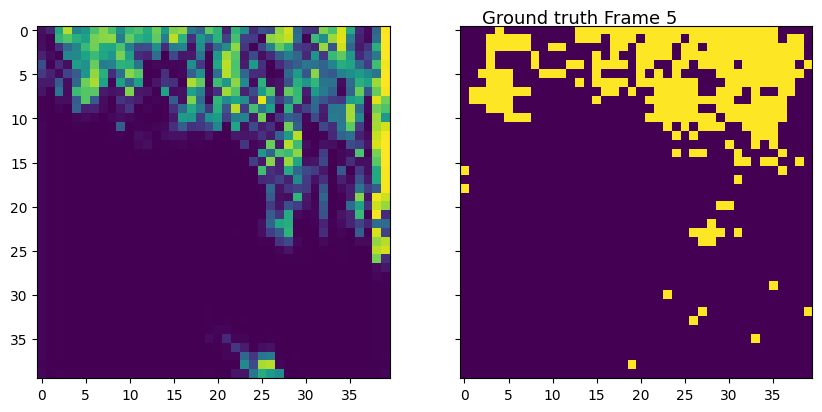

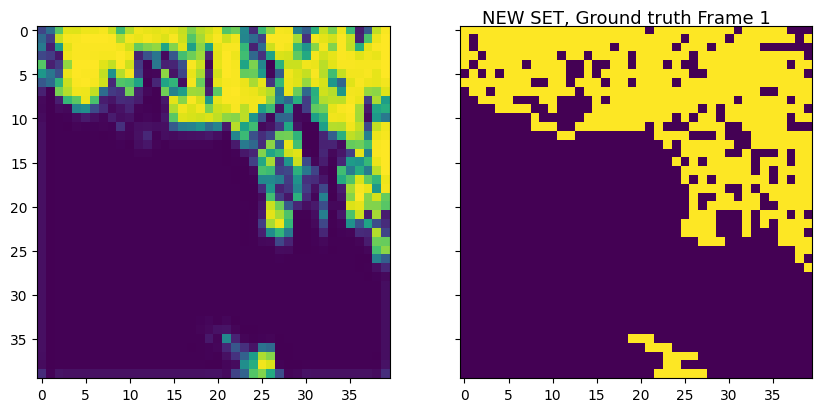

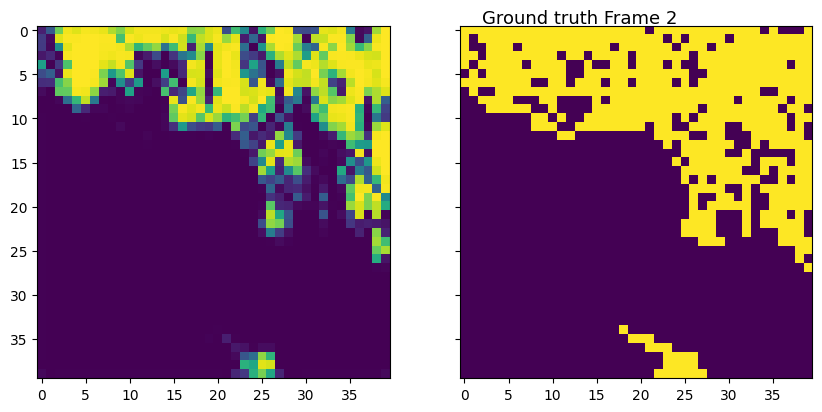

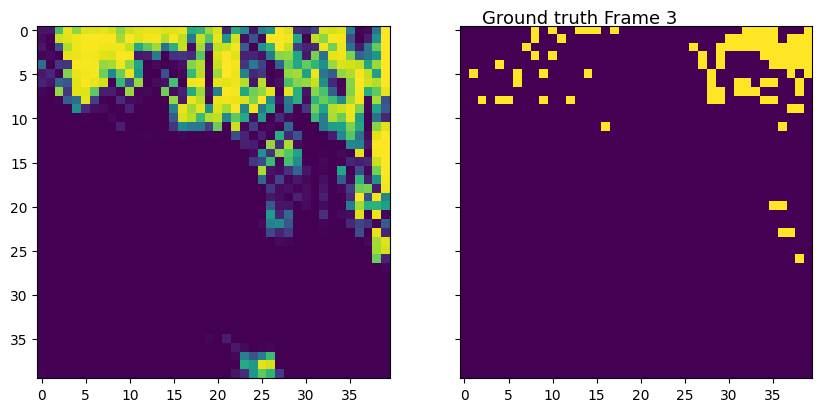

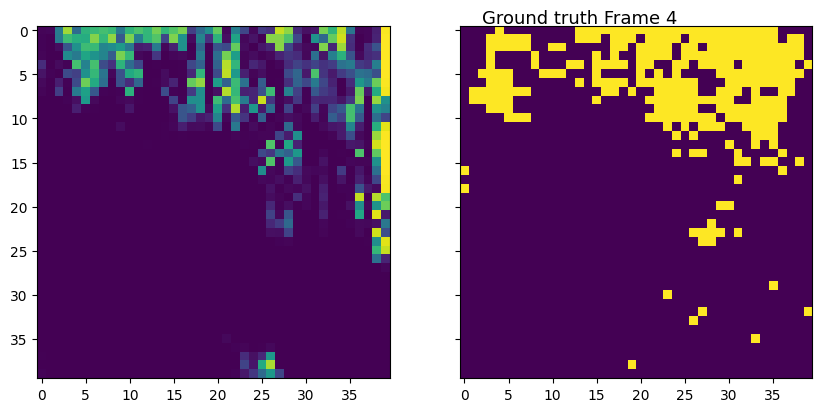

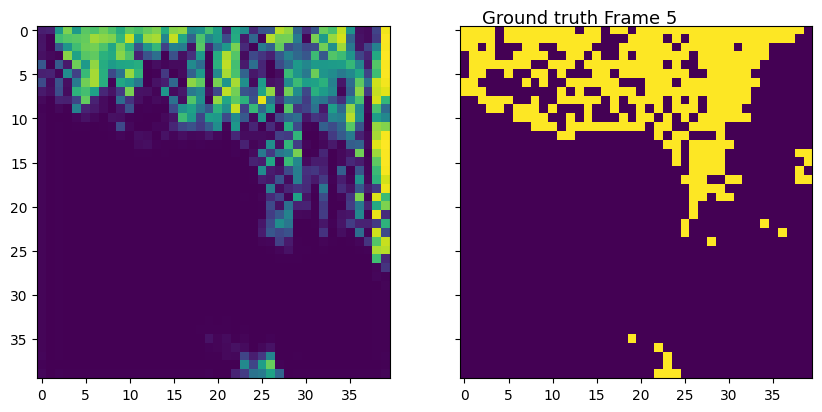

In [180]:
visulization(y_test, Y_hat, 10)

In [181]:
Y_hat[Y_hat > 0.5] = 1

In [182]:
Y_hat[Y_hat <= 0.5] = 0

## Error analysis

In [183]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error as mse
from skimage import data, img_as_float
def compare_single_frame(frameA, frameB):
    m = mse(frameA,frameB)
    # s = ssim(frameA,frameB)
    s = ssim(frameA,frameB, data_range=frameA.max() - frameA.min())
    percentage_of_ones_A = np.sum(frameA == 1) / np.prod(frameA.shape) * 100
    percentage_of_ones_B = np.sum(frameB == 1) / np.prod(frameB.shape) * 100
    fig, axs = plt.subplots(1,2, constrained_layout=True)
    axs[0].imshow(frameA,cmap="gray")
    axs[0].set_title("Predicted, Density: %.2f"%(percentage_of_ones_A))
    axs[1].imshow(frameB, cmap="gray")
    axs[1].set_title(" MSE: %.2f, SSIM: %.2f, Density: %.2f"% (m,s,percentage_of_ones_B))
    plt.show()
    

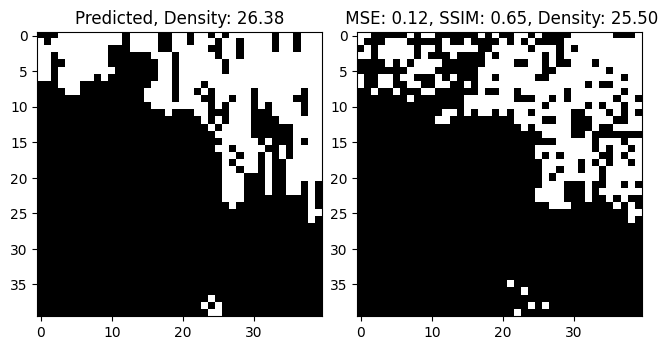

In [184]:
compare_single_frame(Y_hat[7,0,:,:,0],y_test[37,0,:,:,0])

## Predicitng values of emission (smoke density)

In [185]:
Y_hat[5,0,:,:,:].mean()

0.219375

In [186]:
def compare_single_sample(sampleA, sampleB):
    fig, axs = plt.subplots(5,2,sharey=True, sharex=True, figsize=(20,20))
    fig.tight_layout()
    sample_m = 0
    sample_s = 0
    sample_per_A = 0
    sample_per_B = 0
    for frame in range(0,5):
        frameA = sampleA[frame]
        frameB = sampleB[frame]

        m = mse(frameA,frameB)
        # s = ssim(frameA,frameB)
        s = ssim(frameA,frameB, data_range=frameA.max() - frameA.min())
        percentage_of_ones_A = np.sum(frameA == 1) / np.prod(frameA.shape) * 100
        percentage_of_ones_B = np.sum(frameB == 1) / np.prod(frameB.shape) * 100
        sample_per_A = sample_per_A+percentage_of_ones_A/5.0
        sample_per_B = sample_per_B+percentage_of_ones_B/5.0
        sample_m = sample_m + m/5.0
        sample_s = sample_s + s/5.0
        axs[frame][0].imshow(frameA,cmap='gray')
        axs[frame][1].imshow(frameB, cmap="gray")
        axs[frame][0].set_title("Predicted Frame, Density: %.2f" % (percentage_of_ones_A))
        axs[frame][1].set_title(" MSE: %.2f, SSIM: %.2f, Density: %.2f"% (m,s,percentage_of_ones_B))
        
    fig.suptitle("Sample Difference (5 Frames) \n MSE: %.2f, SSIM: %.2f \nMean predicted Density: %.2f \nMean True Density: %.2f" % (sample_m,sample_s, sample_per_A, sample_per_B))
    plt.show()
    

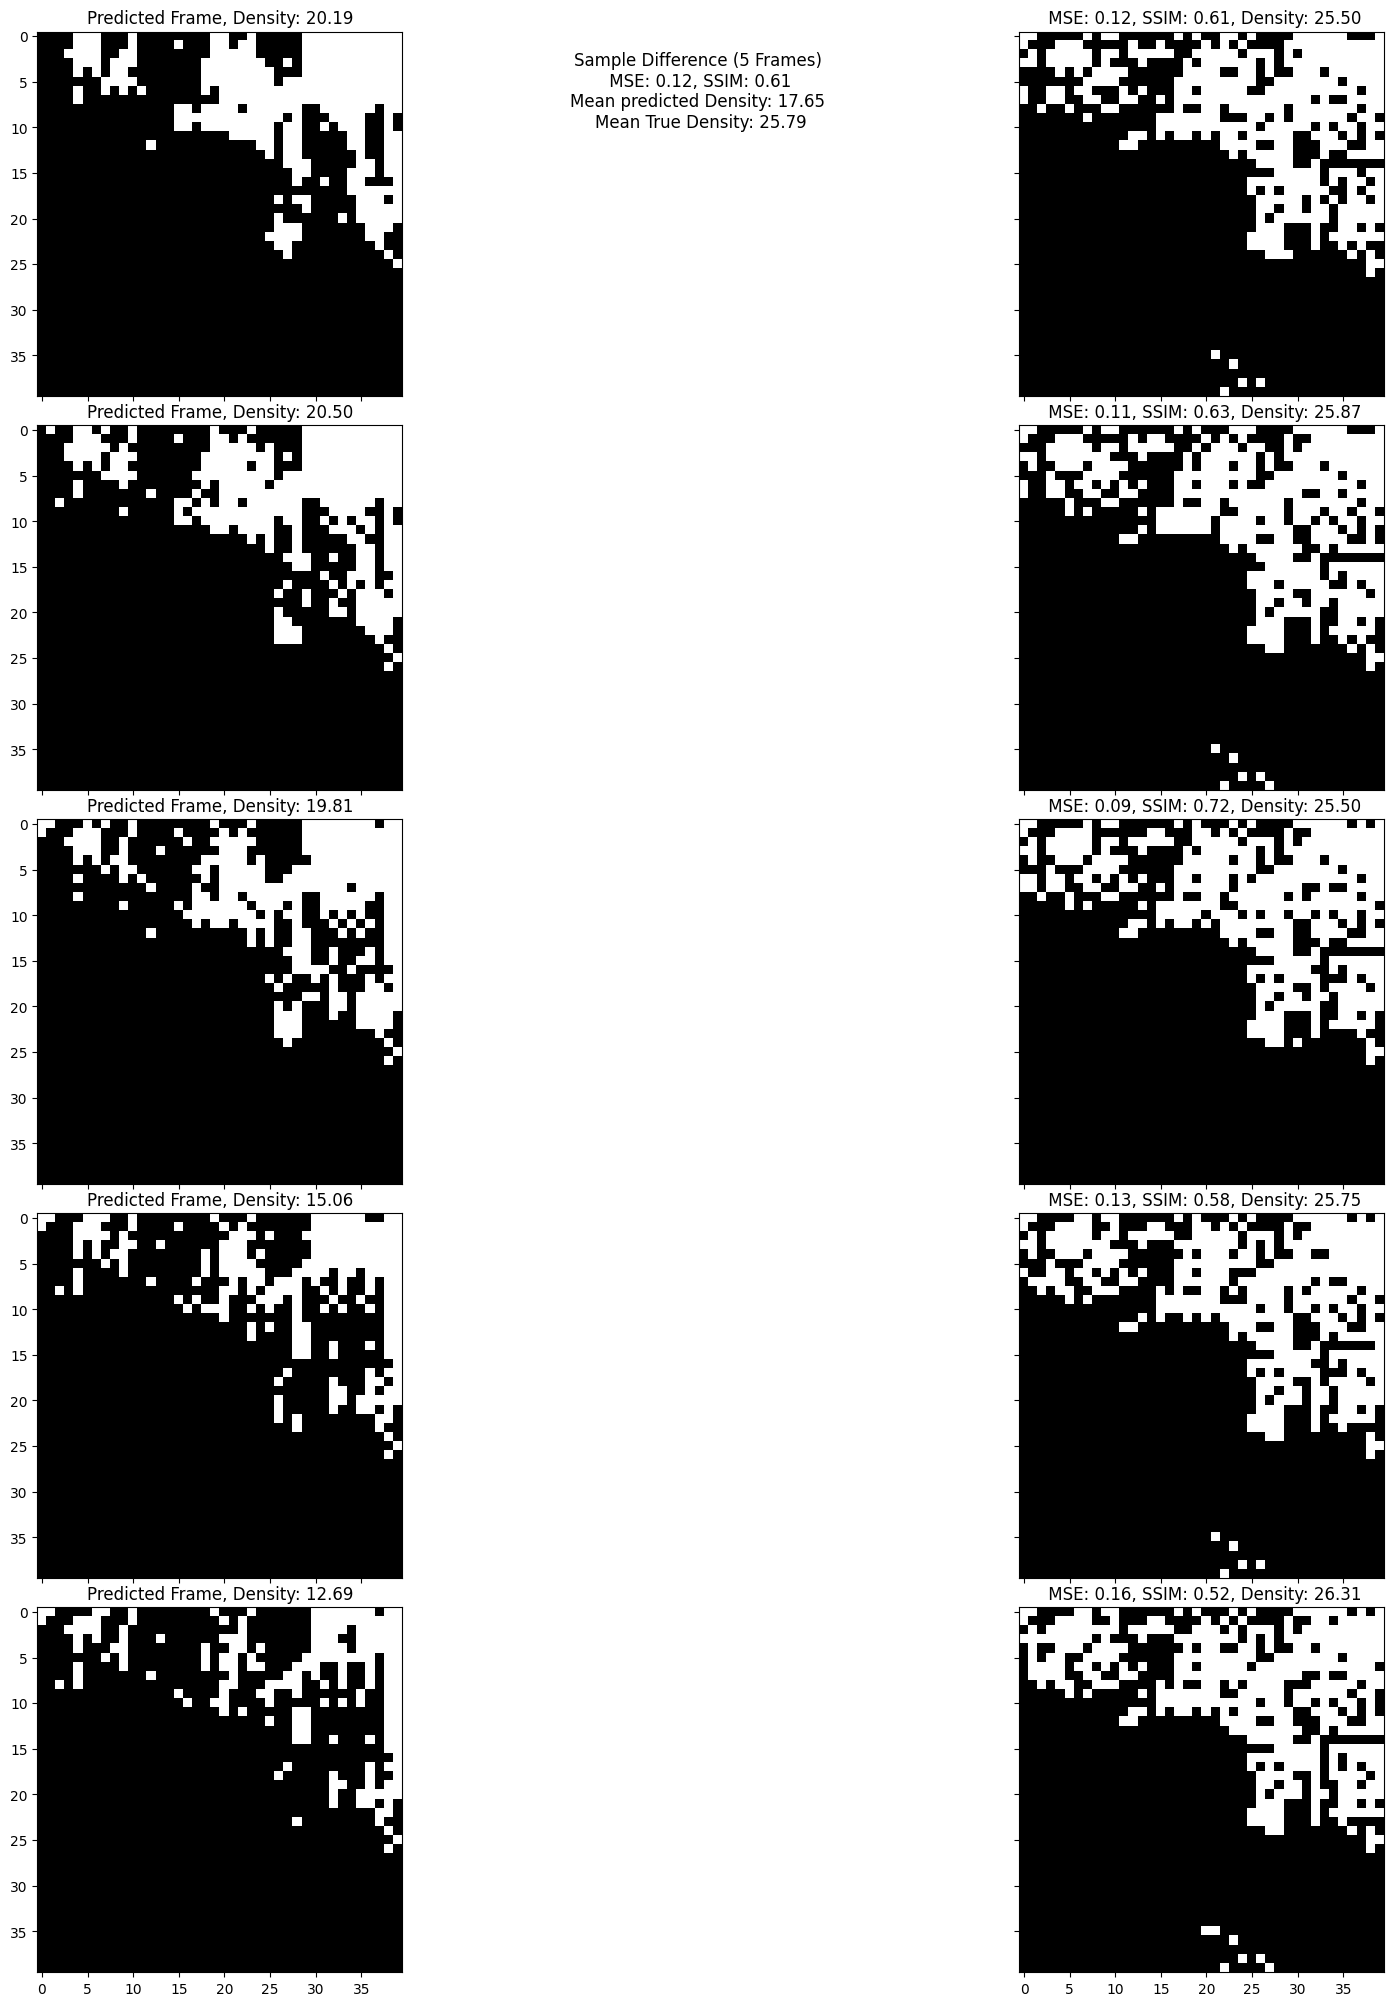

In [187]:
compare_single_sample(Y_hat[37,:,:,:,0],y_test[37,:,:,:,0])

In [188]:
pred_lst = []
true_lst = []
for i in range(1,50):
    percentage_of_ones_pred = np.sum(Y_hat[i,:,:,:,0] == 1) / np.prod(Y_hat[i,:,:,:,0].shape) * 100
    percentage_of_ones_true = np.sum(y_test[i,:,:,:,0] == 1) / np.prod(y_test[i,:,:,:,0].shape) * 100
    pred_lst.append(percentage_of_ones_pred)
    true_lst.append(percentage_of_ones_true)
# print(lst)

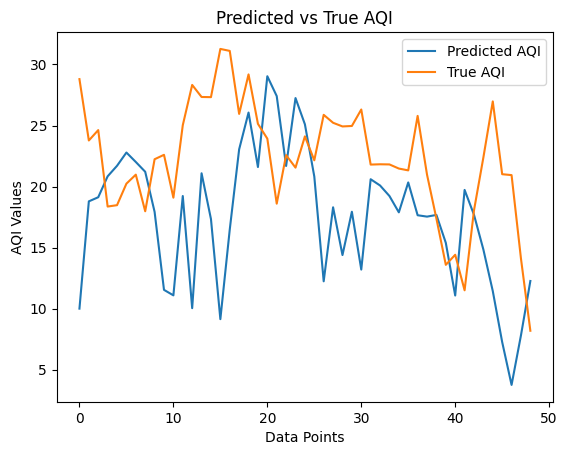

In [189]:
plt.plot(pred_lst, label='Predicted AQI')
plt.plot(true_lst, label='True AQI')

# Adding labels and title
plt.xlabel('Data Points')
plt.ylabel('AQI Values')
plt.title('Predicted vs True AQI')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

## Simple LSTM model

In [190]:
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], -1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], -1))

print(X_train_reshaped.shape, "X_train shape")
print(X_test_reshaped.shape, "X_test shape")

(165, 5, 1600) X_train shape
(55, 5, 1600) X_test shape


In [191]:
y_train = final[5:170]
y_test = final[171:226]
y_train_reshaped = y_train.reshape((y_train.shape[0], y_train.shape[1], -1))
y_test_reshaped = y_test.reshape((y_test.shape[0], y_test.shape[1], -1))
print(y_train_reshaped.shape, "Y_train shape")
print(y_test_reshaped.shape, "y_test shape")

(165, 5, 1600) Y_train shape
(54, 5, 1600) y_test shape


In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, BatchNormalization

# Model architecture
seq_lstm = Sequential()
batch_norm_layer = BatchNormalization()
seq_lstm.add(LSTM(units=1, input_shape=(5, 40 * 40), return_sequences=True))
seq_lstm.add(batch_norm_layer)

seq_lstm.add(LSTM(units=1, return_sequences=True))
seq_lstm.add(batch_norm_layer)

seq_lstm.add(LSTM(units=1, activation='sigmoid', return_sequences=True))
seq_lstm.compile(loss='mean_absolute_error', optimizer='nadam')
seq_lstm.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 5, 1)              6408      
                                                                 
 batch_normalization_14 (Ba  (None, 5, 1)              4         
 tchNormalization)                                               
                                                                 
 lstm_17 (LSTM)              (None, 5, 1)              12        
                                                                 
 lstm_18 (LSTM)              (None, 5, 1)              12        
                                                                 
Total params: 6436 (25.14 KB)
Trainable params: 6434 (25.13 KB)
Non-trainable params: 2 (8.00 Byte)
_________________________________________________________________


In [193]:
# seq_lstm.fit(X_train_reshaped, y_train_reshaped, batch_size=10, epochs=50, validation_split=0.1, shuffle=False, verbose=1)
hist_lstm = seq_lstm.fit(X_train_reshaped, y_train_reshaped, batch_size=10, epochs=50, validation_split=0.1, shuffle=False, verbose=1)

Epoch 1/50
15/15 [==============================] - 14s 166ms/step - loss: 0.3845 - val_loss: 0.3817
Epoch 2/50
15/15 [==============================] - 0s 20ms/step - loss: 0.3793 - val_loss: 0.3803
Epoch 3/50
15/15 [==============================] - 0s 19ms/step - loss: 0.3746 - val_loss: 0.3786
Epoch 4/50
15/15 [==============================] - 0s 19ms/step - loss: 0.3700 - val_loss: 0.3778
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 0.3656 - val_loss: 0.3780
Epoch 6/50
15/15 [==============================] - 0s 24ms/step - loss: 0.3621 - val_loss: 0.3782
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 0.3583 - val_loss: 0.3741
Epoch 8/50
15/15 [==============================] - 0s 26ms/step - loss: 0.3552 - val_loss: 0.3620
Epoch 9/50
15/15 [==============================] - 0s 25ms/step - loss: 0.3531 - val_loss: 0.3725
Epoch 10/50
15/15 [==============================] - 0s 20ms/step - loss: 0.3494 - val_loss: 0.3742
Epoch 1

## Comparison of Models

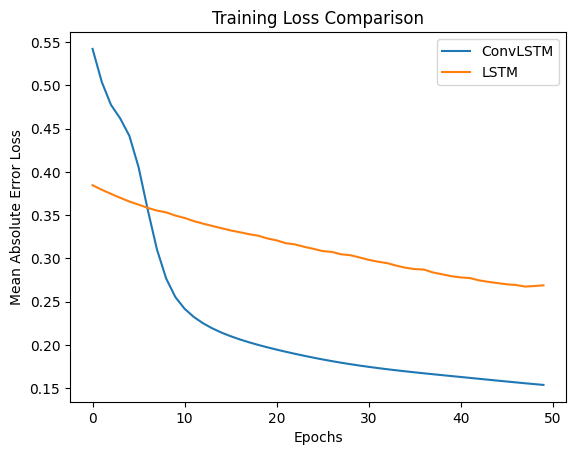

In [194]:
# Plotting the loss curves
plt.plot(hist.history['loss'], label='ConvLSTM')
plt.plot(hist_lstm.history['loss'], label='LSTM')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()

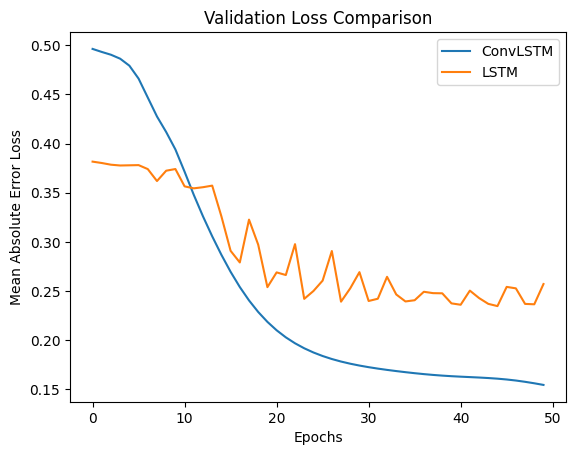

In [195]:
# Plotting the validation loss curves
plt.plot(hist.history['val_loss'], label='ConvLSTM')
plt.plot(hist_lstm.history['val_loss'], label='LSTM')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error Loss')
plt.legend()
plt.show()